# AstroStatistics - Autumn 2019 - Final Project

<b>Objective:</b> Understand the theory behind Gaussian process regression and model astronomical lightcurves using Gaussian processes. For this assignment, astronomical lightcurves come from the Photometric LSST Astronomical Time-Series Classification Challenge (PLAsTiCC) data set. Gaussian process models come from the ``avocado`` software package ([Boone 2019](https://arxiv.org/pdf/1907.04690.pdf)), which adopts the ``george`` python library.

## Motivation

Both observational and physical constraints impact the collection and quality of astronomical time series, leading to significant heterogeneity and ambiguous classification. Gaussian process regression allows us to fit sparse, irregularly sampled astronomical light curves with a smooth function, leading to more effective feature extraction and even extrapolation in cases where no observations are available in a particular bandpass.

## Introduction to Gaussian process regression

*Regression* is any process by which we fit a series of points to a smooth function, or line. *Gaussian process regression* does so by modeling the data with various Gaussian functions, constraining possible functions by the given observations. As such, one often find the smallest variation in possible Gaussian models surrounding the time series input observations, and the largest possible variation (i.e., uncertainty) where there are no observations for a particular time or bandpass. After sampling through numerous models that fit a set of observations, a mean function - the most probable model for the given time series - may be understood as representative of the time series. One may extract features from this model or resample the model for regularized time series analysis.

## PLAsTiCC and Avocado

The Photometric LSST Astronomical Time-Series Classification Challenge (PLAsTiCC) consolidated a data set of ~3.5 million simulated astronomical light curves, with model specifications particular to LSST observational programs. They challenged the astronomical and machine learning communities to design a classification algorithm that would accurately classify the majority of these objects after learning from a training set of ~8,000 light curves.

Avocado, the solution presented by Kyle Boone, uses Gaussian process regression to model the heterogeneous light curves within the PLAsTiCC data set. From these models, he a) extracts features for classification and b) augments the models to represent objects of various redshift, noise level, and seasonal observations. By adding the augmented light curves back to the training set, he was able to construct a training set that was far more representative of the testing set than the original training set provided by PLAsTiCC. 

## Analysis

### Imports and Settings

In [20]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Auxillary
import avocado

# Settings
rcParams['figure.figsize'] = [6.5, 6.5]
rcParams['font.size'] = 10

### Load the data

In [21]:
# Define the training set
training_set = avocado.Dataset.load("plasticc_train")

### Fit with a Gaussian process

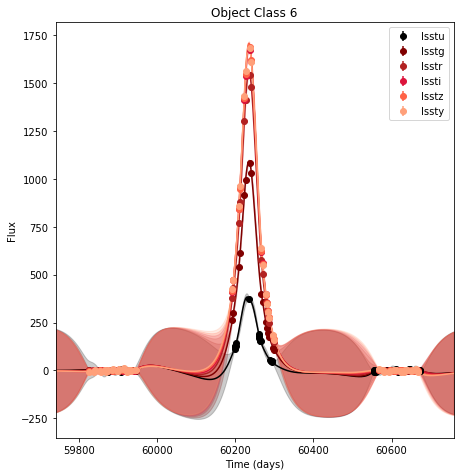

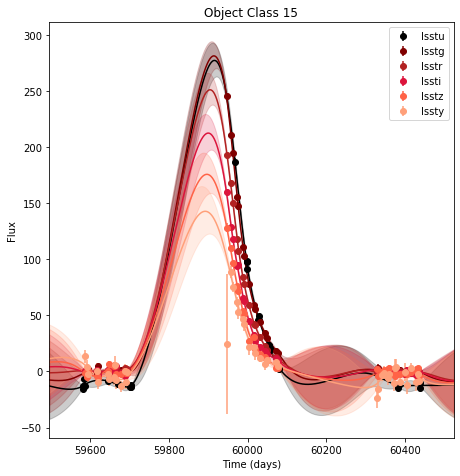

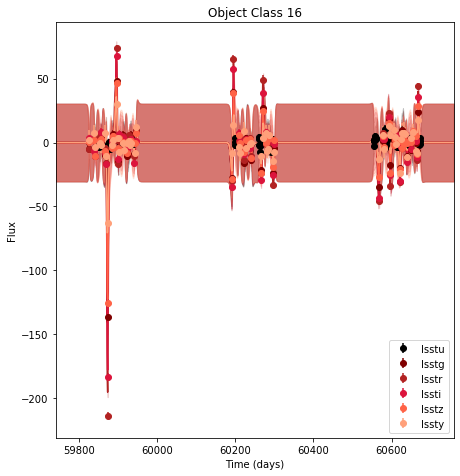

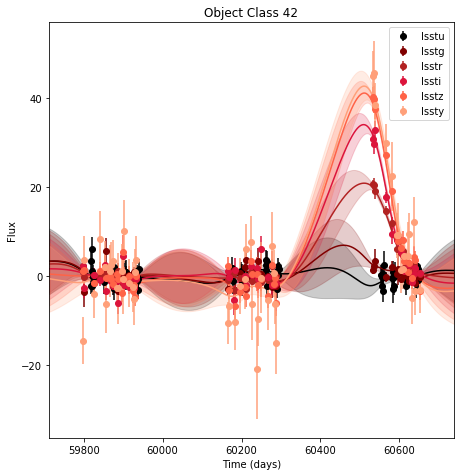

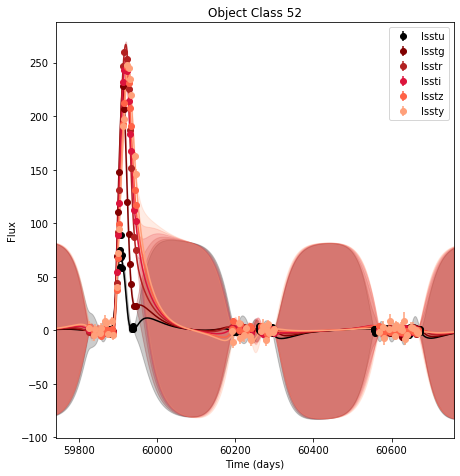

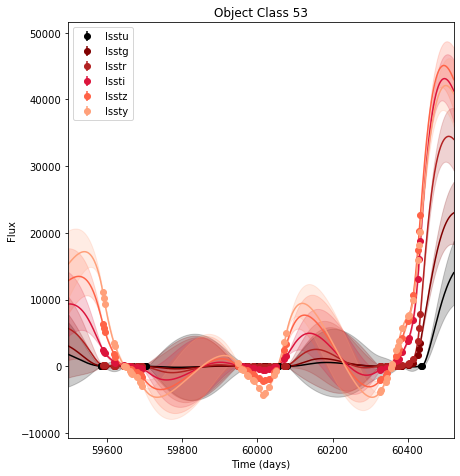

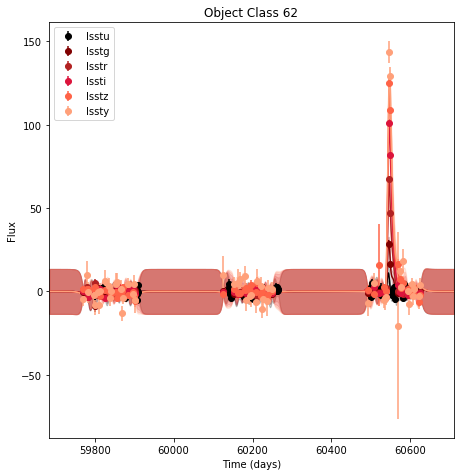

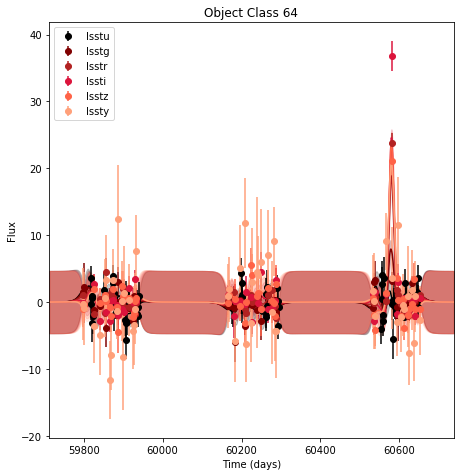

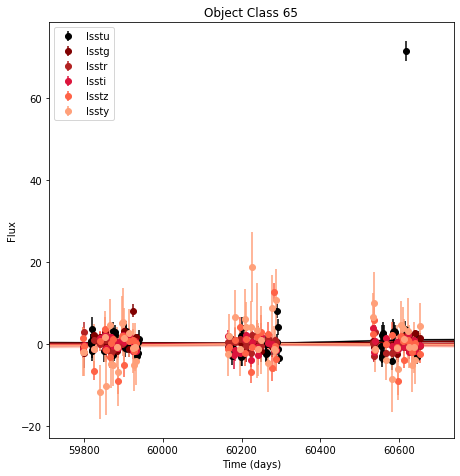

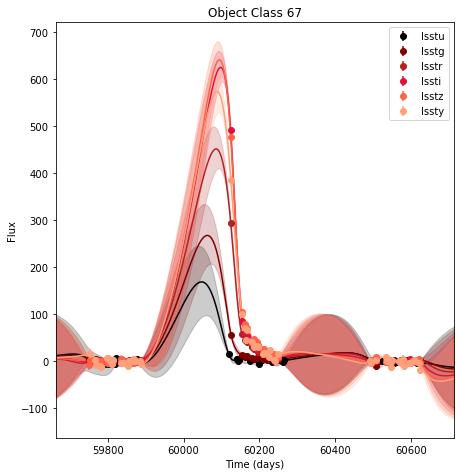

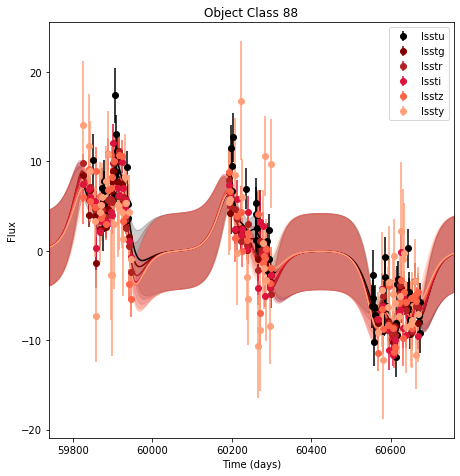

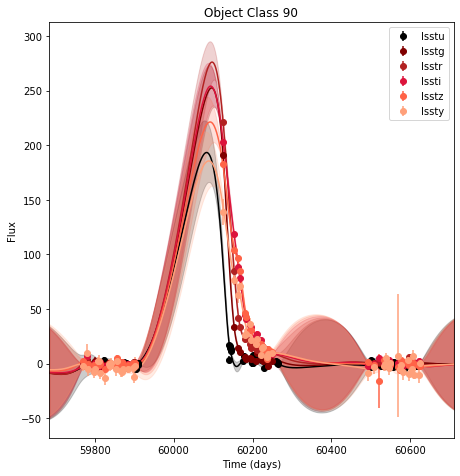

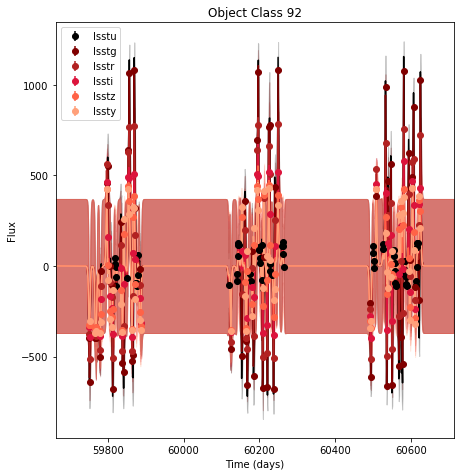

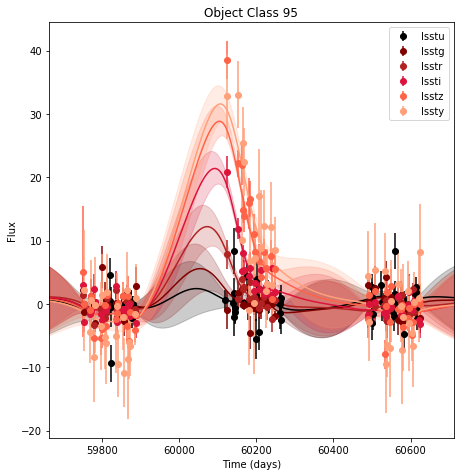

In [23]:
# Separate objects by class
obj_classes = np.array([6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])

# Plot
for i in obj_classes:
    astro_object = training_set.get_object(0, object_class = i)
    astro_object.plot_light_curve()
    plt.title("Object Class "+str(i))  

## Review

We see in the above examples that, surrounding given observations, the mean function is highly constrained. Conversely, during seasons with no observations or observations with large error bars, the models are only contrained by the variety of models used to derive a mean function. We further see that the ``avocado`` model fits a two-dimensional Gaussian process, fitting for both time and wavelength. This ensures that even if there are no observations for one of the bands, the mean function for that band generally follows the brightness pattern of the other bands for where there *are* observations. Finally, the practice of using Gaussian models in particular offers sufficient models for supernovae rise times given little to no direct observations of the object's initial rise in brightness (Objects 15, 42, 67, 90, 95). Without Gaussian processes to fill in these gaps, standard classification with feature extraction may prevent reliable classification for these objects.

Gaussian process regression is an important step for astronomical light curve classifcation, as it provides quality training set augmentation and regularization.